Чтение LH-спектра 

In [1]:
import os
from collections import namedtuple
def read_parameters(f):
    file_path = os.path.abspath(f)
    file = open(file_path)

    for i in range(53):
        header = file.readline()
    print(header)

    sp_pos = dict([ ('X', []) , ('Y', []) ])
    sp_neg = dict([ ('X', []) , ('Y', []) ])
    spectrum = sp_pos
    print(spectrum)

    lines = file.readlines()
    table = []
    for line in lines:
        #print(line)
        table.append(line.split())

    for row in table:
        if (row[0][0] == '!'):
            print("!!negative Nfi;")
            spectrum = sp_neg
            continue
        for index, (p, item) in enumerate(spectrum.items()):
            #print(p, item, index)
            item.append(float(row[index]))

    sp_pos['X'].pop(-1)
    sp_pos['Y'].pop(-1)
    print(len(sp_pos['X']))
    print(len(sp_neg['X']))

    return sp_pos, sp_neg  

In [2]:
sp_pos, sp_neg = read_parameters('data/40167_90.dat')

!!positive Nfi; P_LH(a.units); points<1001

{'X': [], 'Y': []}
!!negative Nfi;
999
999


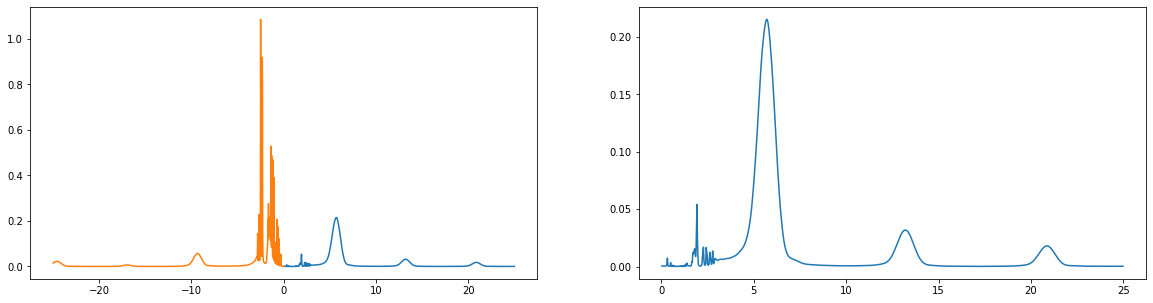

In [3]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 5))
ax1.plot(sp_pos['X'], sp_pos['Y']);
x = [ -x for x in sp_neg['X']]
ax1.plot(x, sp_neg['Y']);
ax2.plot(sp_pos['X'], sp_pos['Y']);